In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
Industry = pd.read_excel("Industry_Portfolios.xlsx", index_col = 0)
M_Portfolio = pd.read_excel('Market_Portfolio.xlsx',index_col = 0)

# Part 1. Minimum_Tracking_Error Frontier

In [3]:
Industry.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


In [4]:
M_Portfolio.head()

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23


In [5]:
combined_data = pd.concat([Industry,M_Portfolio], axis = 1)

combined_data

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Date,,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17


In [6]:
excess_return = combined_data.iloc[:,:10].sub(combined_data.loc[:,'Market'], axis = 0)

excess_return

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


# 1.1 Estimate the expected deviation from market return, for the ten industry portfolios:

In [7]:
expected_deviation = pd.DataFrame(excess_return.mean(), columns = ['expected_deviation'])

expected_deviation

,expected_deviation
NoDur,0.154750
Durbl,-0.014750
Manuf,0.264750
Enrgy,0.483083
HiTec,0.018167
Telcm,0.133333
Shops,0.168250
Hlth,0.035750
Utils,0.159083
Other,-0.259000


#  1.2 Estimate the covariance matrix of return deviations, for the ten industry portfolios:

In [8]:
V = excess_return.cov()

V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [9]:
V_inv = np.linalg.inv(V)

R = expected_deviation.values.reshape(10,1)

e = np.ones(10).reshape(10,1)

In [10]:
α = float(R.T @ V_inv @ e)

ζ = float(R.T @ V_inv @ R)

δ = float(e.T @ V_inv @ e)

Rmv = α/δ 

α,ζ,δ,Rmv

(2.9321278826305983,
 0.20474497351129933,
 58.5502543763984,
 0.050078823975400845)

In [39]:
Expected_Return_Deviation = np.arange(0.0, 0.1,0.0005)

In [40]:
Expected_Return_Deviation_1 = Expected_Return_Deviation[Expected_Return_Deviation>=0.05]

In [36]:
Expected_Return_Deviation_2 = Expected_Return_Deviation[Expected_Return_Deviation <=0.05]

In [37]:
minimum_tracking_error_1 = ((1/δ) + (δ*(Expected_Return_Deviation_1  - Rmv)**2)/(ζ*δ-α**2))**0.5

In [35]:
minimum_tracking_error_2 = ((1/δ) + (δ*(Expected_Return_Deviation_2  - Rmv)**2)/(ζ*δ-α**2))**0.5

# 1.3 Plot the minimum-tracking-error frontier generated by the ten industry portfolios

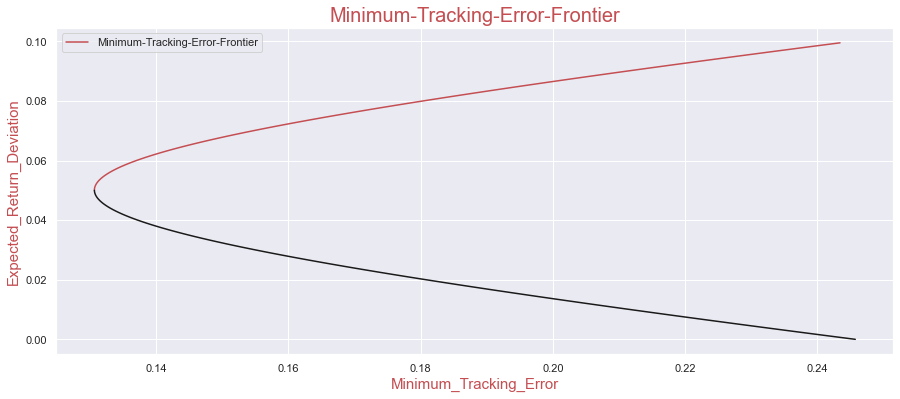

In [16]:
plt.figure(figsize = (15,6))

plt.xlabel('Minimum_Tracking_Error', fontsize = 15, color = 'r')

plt.ylabel('Expected_Return_Deviation', fontsize = 15, color = 'r')

plt.title('Minimum-Tracking-Error-Frontier', fontsize = 20, color = 'r')

plt.plot(minimum_tracking_error_1,Expected_Return_Deviation_1 ,color = 'r', label = 'Minimum-Tracking-Error-Frontier')

plt.plot(minimum_tracking_error_2,Expected_Return_Deviation_2 ,color = 'k')

plt.legend()

plt.show()

In [17]:
Rf = 0.0

In [34]:
minimum_tracking_error_3 = ((Expected_Return_Deviation - Rf)**2 / (ζ - 2*α*Rf+δ*Rf**2))**0.5

In [33]:
Expected_Return_Deviation = Rf + ((ζ -e 2*α*Rf+δ*Rf**2)**0.5)*minimum_tracking_error_3

# 1.4 plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier

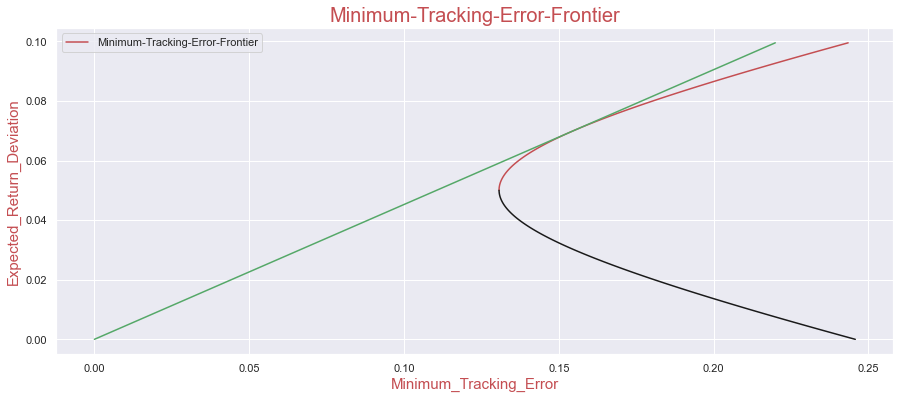

In [20]:
plt.figure(figsize = (15,6))

plt.xlabel('Minimum_Tracking_Error', fontsize = 15, color = 'r')

plt.ylabel('Expected_Return_Deviation', fontsize = 15, color = 'r')

plt.title('Minimum-Tracking-Error-Frontier', fontsize = 20, color = 'r')

plt.plot(minimum_tracking_error_1,Expected_Return_Deviation_1 ,color = 'r', label = 'Minimum-Tracking-Error-Frontier')

plt.plot(minimum_tracking_error_2,Expected_Return_Deviation_2 ,color = 'k')

plt.plot(minimum_tracking_error_3, Expected_Return_Deviation, color = 'g')

plt.legend()

plt.show()

# 1.5 Calculate the information ratio

In [32]:
Information_Ratio = (ζ - 2*α*Rf+δ*Rf**2)**0.5

Information_Ratio 

0.45248753961993177

# 1.6 portfolio weights for the "tangency" portfolio.

In [21]:
Rtg = (α*Rf - ζ) / (δ*Rf - α)
Rtg

0.06982811859065628

In [22]:
λ = (Rtg - Rf)/ (ζ - 2*α*Rf +δ*Rf**2 )

λ

0.3410492447903863

In [31]:
W_tangency_portfolio = λ * V_inv @ (R - Rf*e)

W_tangency_portfolio = pd.DataFrame(W_tangency_portfolio, columns = ['Weight'], index = [Industry.columns])

W_tangency_portfolio

,Weight
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


# Part 2: Minimum-Variance Frontier w/o Short Sales

# 2.1 Generate the minimum-variance frontier without short sales, using Monte Carlo simulation

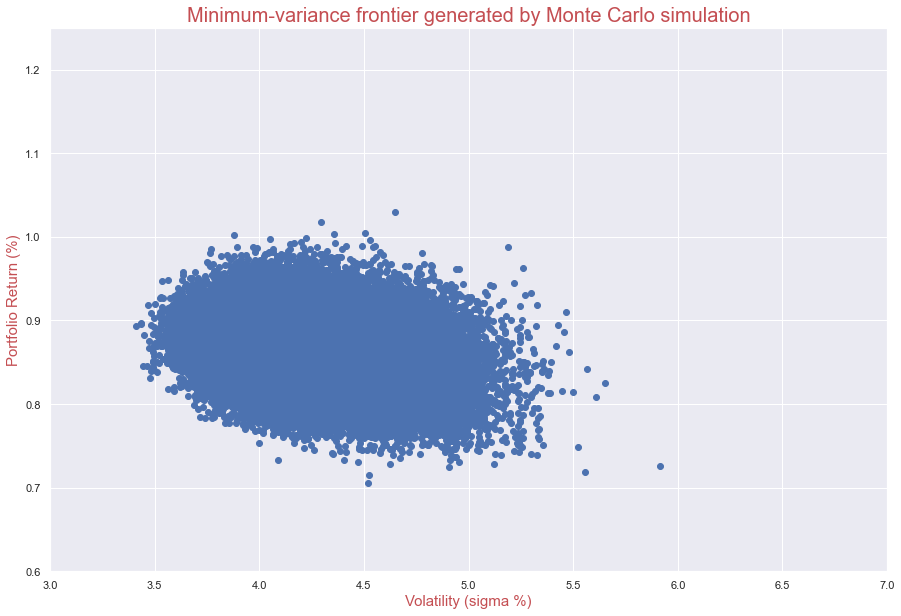

In [46]:
num_p = 100000
all_weights = np.zeros((num_p,len(Industry.columns)))
Rt_portfolio = np.zeros(num_p)
Std_portfolio = np.zeros(num_p)

for i in range(num_p):
    weights = np.random.uniform(0,1,len(Industry.columns))
    weights = weights/np.sum(weights)
    all_weights[i,:] = weights
    Rt_portfolio[i] = np.sum(Industry.mean()*weights)
    Std_portfolio[i] = np.sqrt(np.dot(weights.T,np.dot(Industry.cov(),weights)))

fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(Std_portfolio,Rt_portfolio,c='b')
ax.set_xlim(3,7)
ax.set_ylim(0.6,1.25)

plt.title('Minimum-variance frontier generated by Monte Carlo simulation',fontsize=20, color = 'r')
plt.xlabel('Volatility (sigma %)',fontsize = 15, color = 'r')
plt.ylabel('Portfolio Return (%)', fontsize = 15, color = 'r')

plt.show()

# 2.2  Plot the new data points with mean return on the vertical axis and standard deviation of return on the horizontal axis.

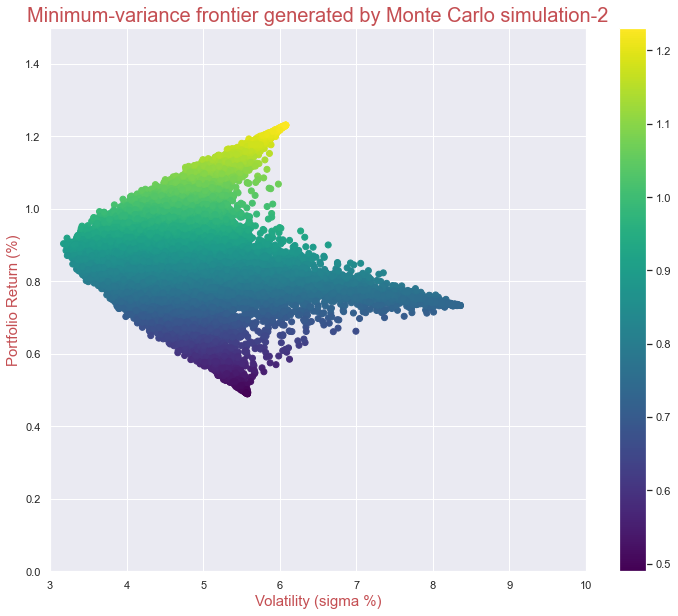

In [49]:
for i in range(num_p):
    weights = np.random.uniform(0,1,len(Industry.columns))
    weights = weights/np.sum(weights)
    weights_1 = 1/weights
    weights_1 = weights_1/np.sum(weights_1)
    all_weights[i,:] = weights_1
    Rt_portfolio[i] = np.sum(Industry.mean()*weights_1)
    Std_portfolio[i] = np.sqrt(np.dot(weights_1.T,np.dot(Industry.cov(),weights_1)))

fig,ax = plt.subplots(figsize=(12,10))
plt.scatter(Std_portfolio,Rt_portfolio,c=Rt_portfolio,cmap='viridis')
ax.set_xlim(3,10)
ax.set_ylim(0,1.5)
plt.title('Minimum-variance frontier generated by Monte Carlo simulation-2',fontsize=20, color = 'r')
plt.colorbar()
plt.xlabel('Volatility (sigma %)', fontsize = 15, color = 'r')
plt.ylabel('Portfolio Return (%)', fontsize = 15, color = 'r')

plt.show()